In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## 0. Making the artificial data

In [2]:
from sklearn.datasets import make_blobs

In [3]:
np.random.seed(1234)

In [4]:
n_dim = 2
x_train, y_train = make_blobs(n_samples=100, n_features=n_dim, centers=[[1,1],[-1,-1]], shuffle=True)
x_test, y_test = make_blobs(n_samples=30, n_features=n_dim, centers=[[1,1],[-1,-1]], shuffle=True)

In [5]:
print(x_train[:10,:])
print(y_train[:10])

[[-3.08526564  0.93024677]
 [ 1.40545341  1.28909194]
 [ 1.35402033  0.96448697]
 [ 1.01569637 -1.24268495]
 [-2.47311641 -1.89658062]
 [-0.37122417 -0.81350565]
 [-1.78110528 -1.46801767]
 [-1.4507651  -0.25083619]
 [-0.18387277  0.89353447]
 [-0.06898878  0.48811869]]
[1 0 0 0 1 1 1 1 1 0]


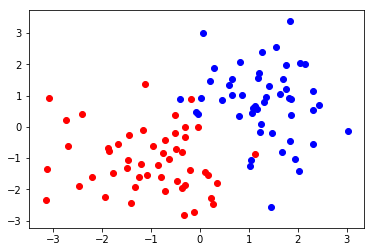

In [6]:
# Training data
plt.figure()
plt.scatter(x_train[(y_train==0),0], x_train[(y_train==0),1], c='blue', marker='o')
plt.scatter(x_train[(y_train==1),0], x_train[(y_train==1),1], c='red', marker='o')

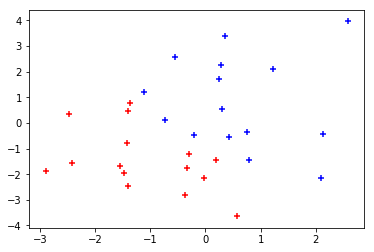

In [7]:
# Test data
plt.figure()
plt.scatter(x_test[(y_test==0),0], x_test[(y_test==0),1], c='blue', marker='+')
plt.scatter(x_test[(y_test==1),0], x_test[(y_test==1),1], c='red', marker='+')

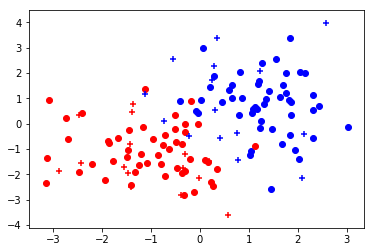

In [8]:
# Training data + Test data
plt.figure()
plt.scatter(x_train[(y_train==0),0], x_train[(y_train==0),1], c='blue', marker='o')
plt.scatter(x_train[(y_train==1),0], x_train[(y_train==1),1], c='red', marker='o')
plt.scatter(x_test[(y_test==0),0], x_test[(y_test==0),1], c='blue', marker='+')
plt.scatter(x_test[(y_test==1),0], x_test[(y_test==1),1], c='red', marker='+')

## 1. Logistic regression

In [9]:
# Logistic function (a.k.a., softmax function, sigmoid function)
def logistic(x):
    return 1.0 / (1 + np.exp(-x))

In [10]:
def logit(x, beta):
    logit = np.dot(x, beta)
    return logit

In [11]:
beta = [0.1, -0.1]
y_hat = logistic(logit(x=x_train, beta=beta)) # Y = 1일 확률
print(y_hat[:10])
print(y_train[:10])

[0.40093969 0.502909   0.5097371  0.55622078 0.4855906  0.51105523
 0.49217345 0.47003772 0.47309084 0.48607591]
[1 0 0 0 1 1 1 1 1 0]


In [12]:
def negative_log_likelihood(x, y, beta, avg=False):
    y_hat = logistic(logit(x=x_train, beta=beta))
    log_likelihood = y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)
    if not avg:
        return -log_likelihood
    else:
        return np.mean(-log_likelihood)

In [13]:
loss = negative_log_likelihood(x=x_train, y=y_train, beta=beta)
print(loss)

[0.91394425 0.69898218 0.71281351 0.8124281  0.7223894  0.6712776
 0.70892409 0.75494233 0.74846785 0.66567972 0.75605519 0.77074811
 0.64535098 0.65383749 0.57569066 0.67647867 0.68874046 0.84679756
 0.63866006 0.59085049 0.69423565 0.85124149 0.67530831 0.75203237
 0.87953064 0.7022032  0.82523673 0.81401086 0.69493173 0.70828261
 0.71423112 0.61170278 0.67316966 0.6923738  0.72320923 0.68542304
 0.6932292  0.75066904 0.72579561 0.80346862 0.6751765  0.63116504
 0.65705893 0.78665339 0.66379138 0.70108291 0.61929797 0.71930395
 0.77971827 0.67821442 0.67441024 0.73807277 0.71068698 0.56628199
 0.61851314 0.74365191 0.72378566 0.59807502 0.6329705  0.64897353
 0.80426387 0.74704017 0.91468706 0.82552243 0.68232878 0.66953302
 0.70222402 0.71742527 0.70700835 0.71577288 0.85289574 0.68229194
 0.78421815 0.6748539  0.78650847 0.7074115  0.7205191  0.71607019
 0.63020887 0.75327663 0.74890245 0.6688089  0.63601626 0.5571651
 0.57597642 0.84476296 0.61626733 0.76450557 0.86434324 0.628393

## 2. Learning logistic regression model
- Using batch gradient descent method

In [14]:
def logistic_regression(x, y, num_steps=50, learning_rate=0.01):
    initial_beta = np.asarray([10, 10])
    beta_list = []
    beta_list.append(initial_beta)
    beta = initial_beta
    
    for step in range(num_steps):
        y_hat = logistic(logit(x=x_train, beta=beta))
        gradient = np.dot(x.T, y_hat - y)
        new_beta = beta - learning_rate * gradient
        loss = negative_log_likelihood(x, y, beta, avg=True)
        
        # Print
        loss_tracking = '[%d step] loss %.4f' % (step, loss)
        beta_equation = '[%.2f %.2f] = [%.2f %.2f] - %.2f * [%.2f %.2f]' % (new_beta[0], new_beta[1], beta[0], beta[1], learning_rate, gradient[0], gradient[1])
        print(loss_tracking, '\t', beta_equation)
        
        beta_list.append(new_beta)
        beta = new_beta
        
    return beta, beta_list

In [15]:
beta, beta_list = logistic_regression(x=x_train, y=y_train, num_steps=100, learning_rate=0.01)

[0 step] loss inf 	 [8.87 9.02] = [10.00 10.00] - 0.01 * [112.85 98.09]
[1 step] loss inf 	 [7.74 8.04] = [8.87 9.02] - 0.01 * [112.76 98.14]
[2 step] loss inf 	 [6.62 7.06] = [7.74 8.04] - 0.01 * [112.65 98.20]
[3 step] loss 14.4212 	 [5.49 6.07] = [6.62 7.06] - 0.01 * [112.49 98.27]
[4 step] loss 12.1915 	 [4.37 5.09] = [5.49 6.07] - 0.01 * [112.25 98.38]
[5 step] loss 9.9651 	 [3.25 4.10] = [4.37 5.09] - 0.01 * [111.80 98.55]
[6 step] loss 7.7470 	 [2.14 3.12] = [3.25 4.10] - 0.01 * [110.91 98.82]
[7 step] loss 5.5483 	 [1.05 2.12] = [2.14 3.12] - 0.01 * [108.91 99.09]
[8 step] loss 3.4079 	 [0.03 1.14] = [1.05 2.12] - 0.01 * [102.77 98.42]
[9 step] loss 1.5123 	 [-0.76 0.26] = [0.03 1.14] - 0.01 * [78.50 87.55]
[10 step] loss 0.4883 	 [-1.05 -0.16] = [-0.76 0.26] - 0.01 * [29.21 42.25]
[11 step] loss 0.2923 	 [-1.20 -0.38] = [-1.05 -0.16] - 0.01 * [15.39 22.09]
[12 step] loss 0.2316 	 [-1.32 -0.53] = [-1.20 -0.38] - 0.01 * [11.27 14.85]
[13 step] loss 0.2010 	 [-1.41 -0.64] = [-1.3

/Users/kth/miniconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
print(beta)
print(beta_list)

In [ ]:
# Comes from Kyunghyun Cho's ML lecture (https://github.com/nyu-dl/Intro_to_ML_Lecture_Note)
def vis_hyperplane(beta, style='k--'):

    lim0 = plt.gca().get_xlim()
    lim1 = plt.gca().get_ylim()
    m0, m1 = lim0[0], lim0[1]

    intercept0 = -(beta[0] * m0 + beta[-1])/beta[1]
    intercept1 = -(beta[0] * m1 + beta[-1])/beta[1]
    
    plt1, = plt.plot([m0, m1], [intercept0, intercept1], style)

    plt.gca().set_xlim(lim0)
    plt.gca().set_ylim(lim1)
        
    return plt1

In [ ]:
# Training data + Hyperplane
plt.figure()
plt.scatter(x_train[(y_train==0),0], x_train[(y_train==0),1], c='blue', marker='o')
plt.scatter(x_train[(y_train==1),0], x_train[(y_train==1),1], c='red', marker='o')

initial_beta_plot = vis_hyperplane(beta_list[0], 'k--')
beta_plot_10 = vis_hyperplane(beta_list[9], 'b--')
beta_plot_15 = vis_hyperplane(beta_list[14], 'r--')
beta_plot = vis_hyperplane(beta, 'g--')

plt.legend([initial_beta_plot, beta_plot_10, beta_plot_15, beta_plot], ['Randomly initialized beta', 'Learned beta(10th updated)', 'Learned beta(15th updated)', 'Learned beta'])

In [ ]:
# Test data + Hyperplane
plt.figure()
plt.scatter(x_test[(y_test==0),0], x_test[(y_test==0),1], c='blue', marker='+')
plt.scatter(x_test[(y_test==1),0], x_test[(y_test==1),1], c='red', marker='+')

initial_beta_plot = vis_hyperplane(beta_list[0], 'k--')
beta_plot = vis_hyperplane(beta, 'g--')

plt.legend([initial_beta_plot, beta_plot], ['Randomly initialized beta', 'Learned beta'])

In [ ]:
# Training data + Test data
plt.figure()
plt.scatter(x_train[(y_train==0),0], x_train[(y_train==0),1], c='blue', marker='o', alpha=0.1)
plt.scatter(x_train[(y_train==1),0], x_train[(y_train==1),1], c='red', marker='o', alpha=0.1)
plt.scatter(x_test[(y_test==0),0], x_test[(y_test==0),1], c='blue', marker='+')
plt.scatter(x_test[(y_test==1),0], x_test[(y_test==1),1], c='red', marker='+')

initial_beta_plot = vis_hyperplane(beta_list[0], 'k--')
beta_plot = vis_hyperplane(beta, 'g--')

plt.legend([initial_beta_plot, beta_plot], ['Randomly initialized beta', 'Learned beta'])